In [18]:
from generate_samples import SyntheticDAG
from models.causal_peeler import identify
from models.noise_estimator import estimate_noise
from data.visualize import show_results

from score_estimators.ssm import ssm_hess
from score_estimators.stein import stein_hess, fast_stein_hess

from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.colors import LinearSegmentedColormap

import torch
import numpy as np

In [19]:
def PolynomialInstance(degree=2):
    return Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])

In [20]:
DAG_type = 'line'
num_latent = 4
num_samples = 100000

graph = SyntheticDAG(num_latent, DAG_type)
G = torch.empty(4, 4).uniform_(-1, 1)

# SSM Score Estimation

In [21]:
U, X, N = graph.sample_scaled(G, num_samples)

In [22]:
U_estimates, layers = identify(X, ssm_hess)
N_estimates = estimate_noise(U_estimates, layers, PolynomialInstance)

-----------------------------------------------------------
Removing Layer 0.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Optimal solution found:
[ 0.87990689  0.18512973 -0.09296755 -0.43259793]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Optimal solution found:
[ 0.81215999 -0.57718117 -0.01564087]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Optimal solution found:
[-0.84257015  0.52934575]

No feasible solution found.
Done.

Peeled off 1 nodes.
----------------------------------

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


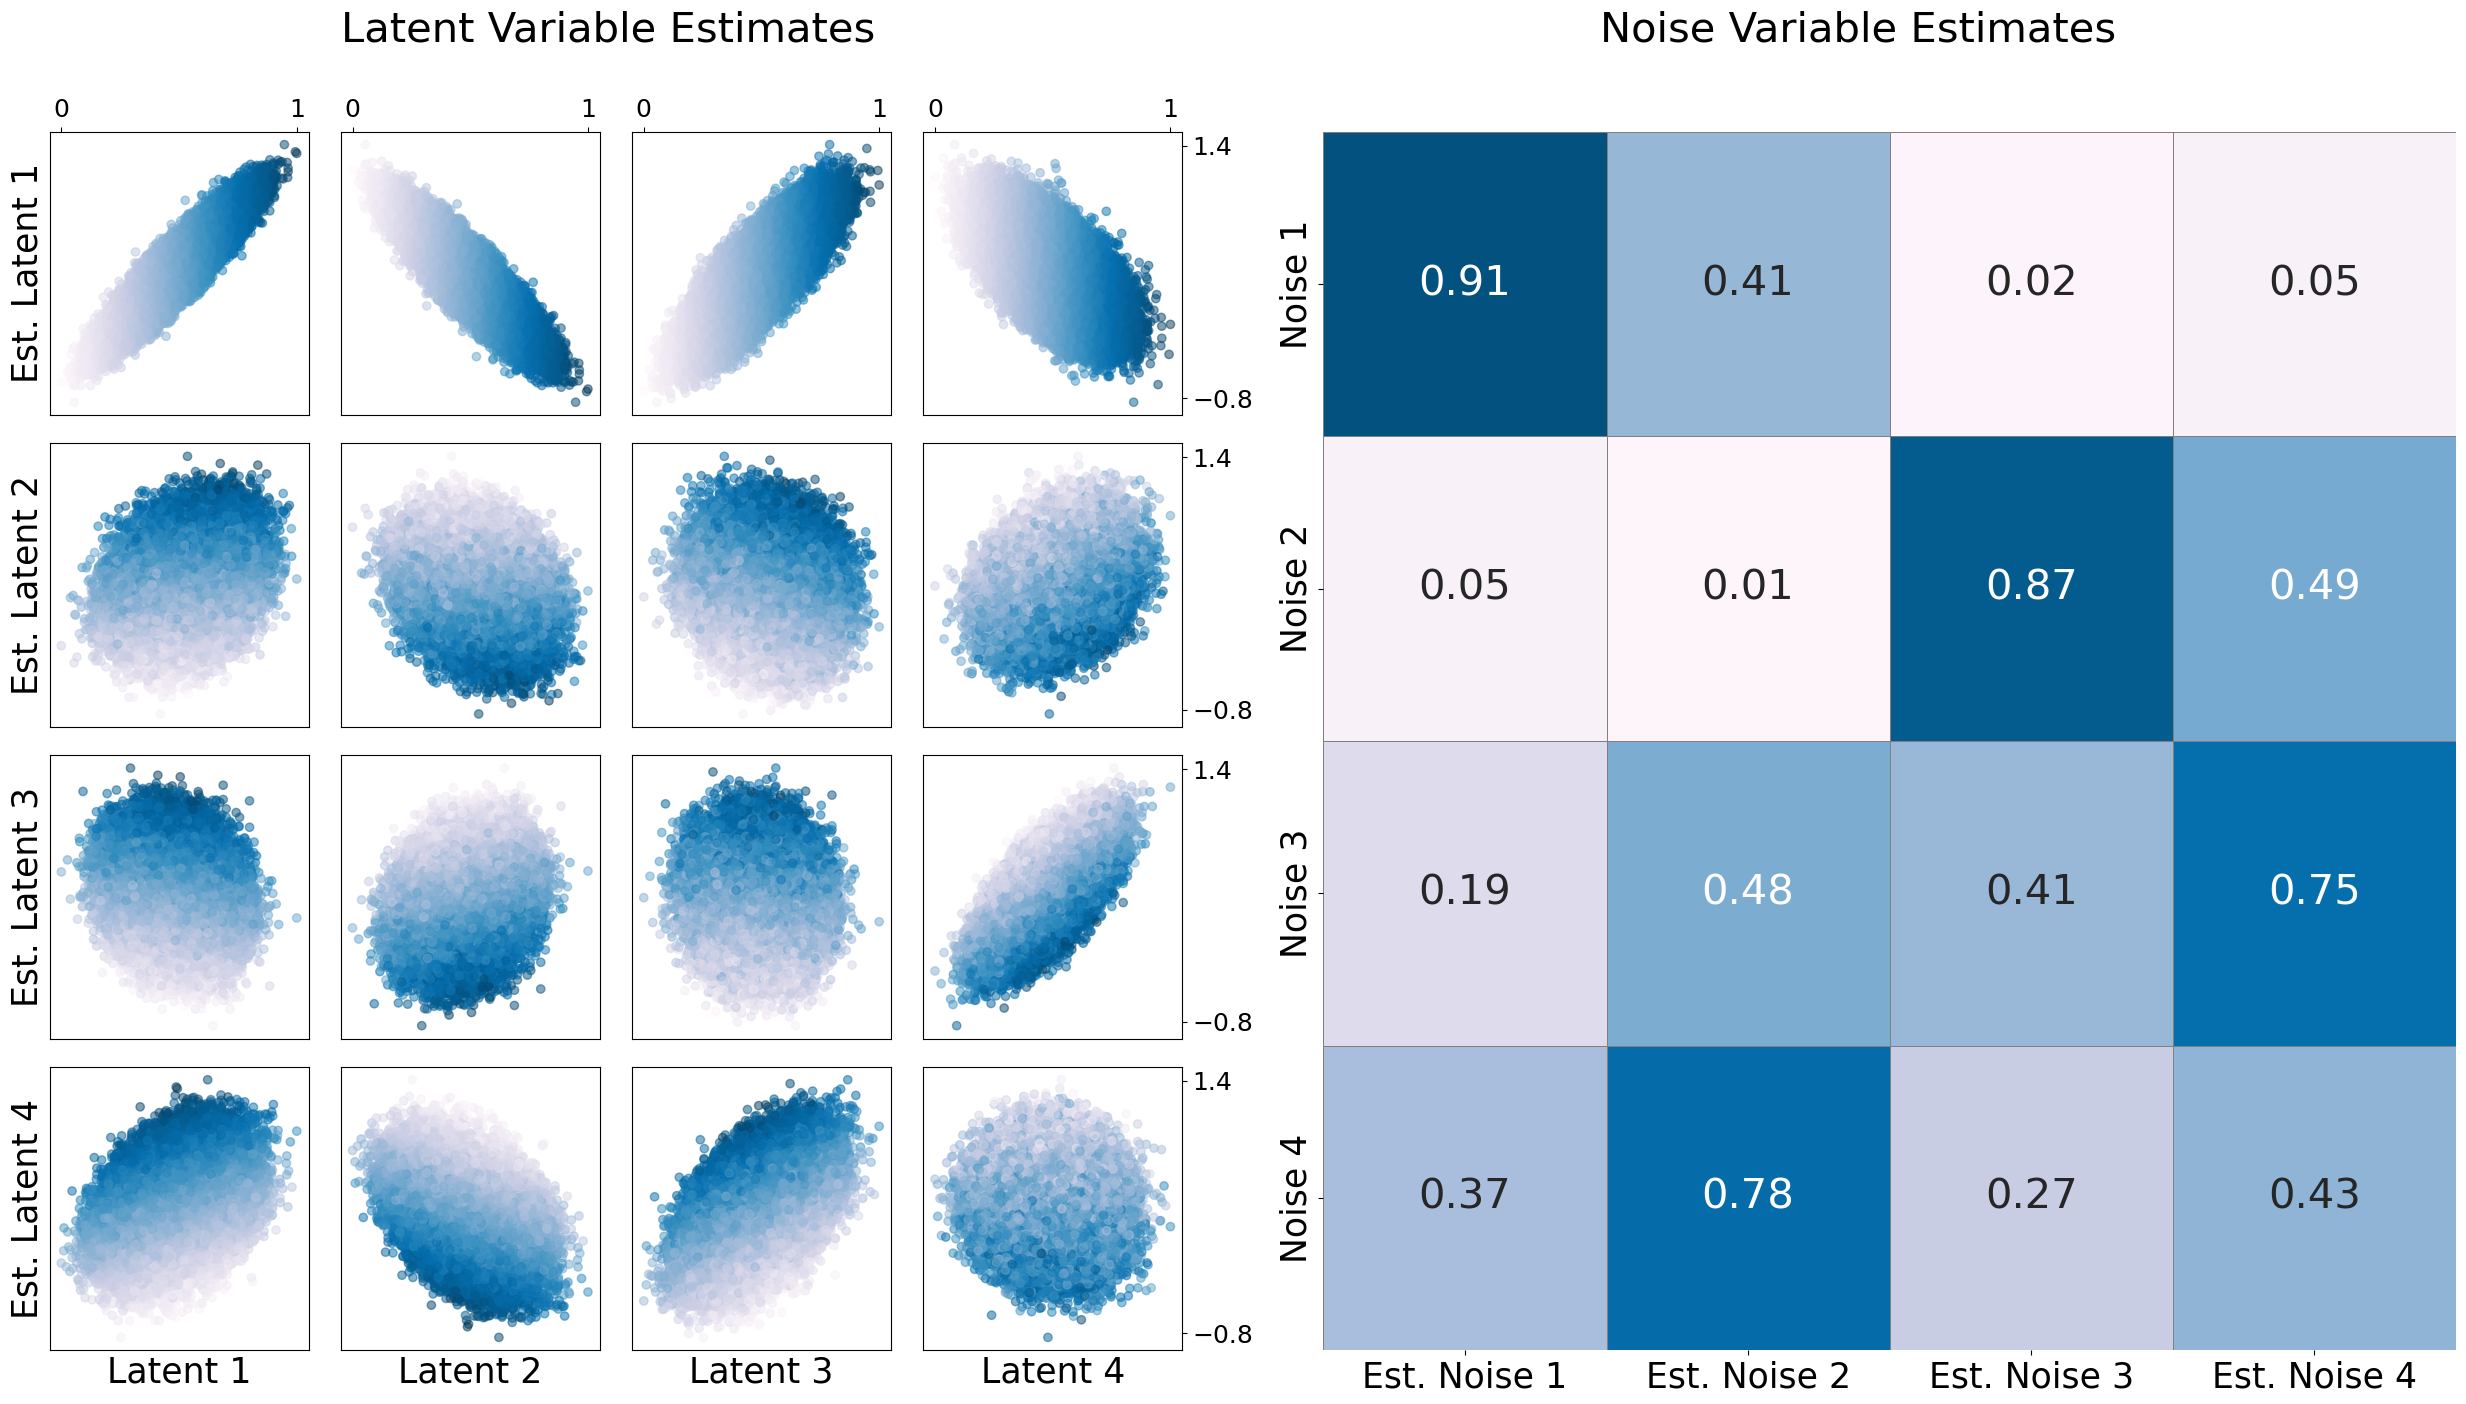

In [23]:
show_results(U, N, U_estimates, N_estimates)

# Stein Score Estimation

In [24]:
U, X, N = graph.sample_scaled(G, num_samples=10000)

In [25]:
U_estimates, layers = identify(X, fast_stein_hess)
N_estimates = estimate_noise(U_estimates, layers, PolynomialInstance)

-----------------------------------------------------------
Removing Layer 0.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Optimal solution found:
[-0.75096029 -0.32371835  0.49567598 -0.27493141]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Optimal solution found:
[ 0.45982672 -0.82687441  0.30910856]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Optimal solution found:
[ 0.66743044 -0.73792825]

No feasible solution found.
Done.

Peeled off 1 nodes.
----------------------------------

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


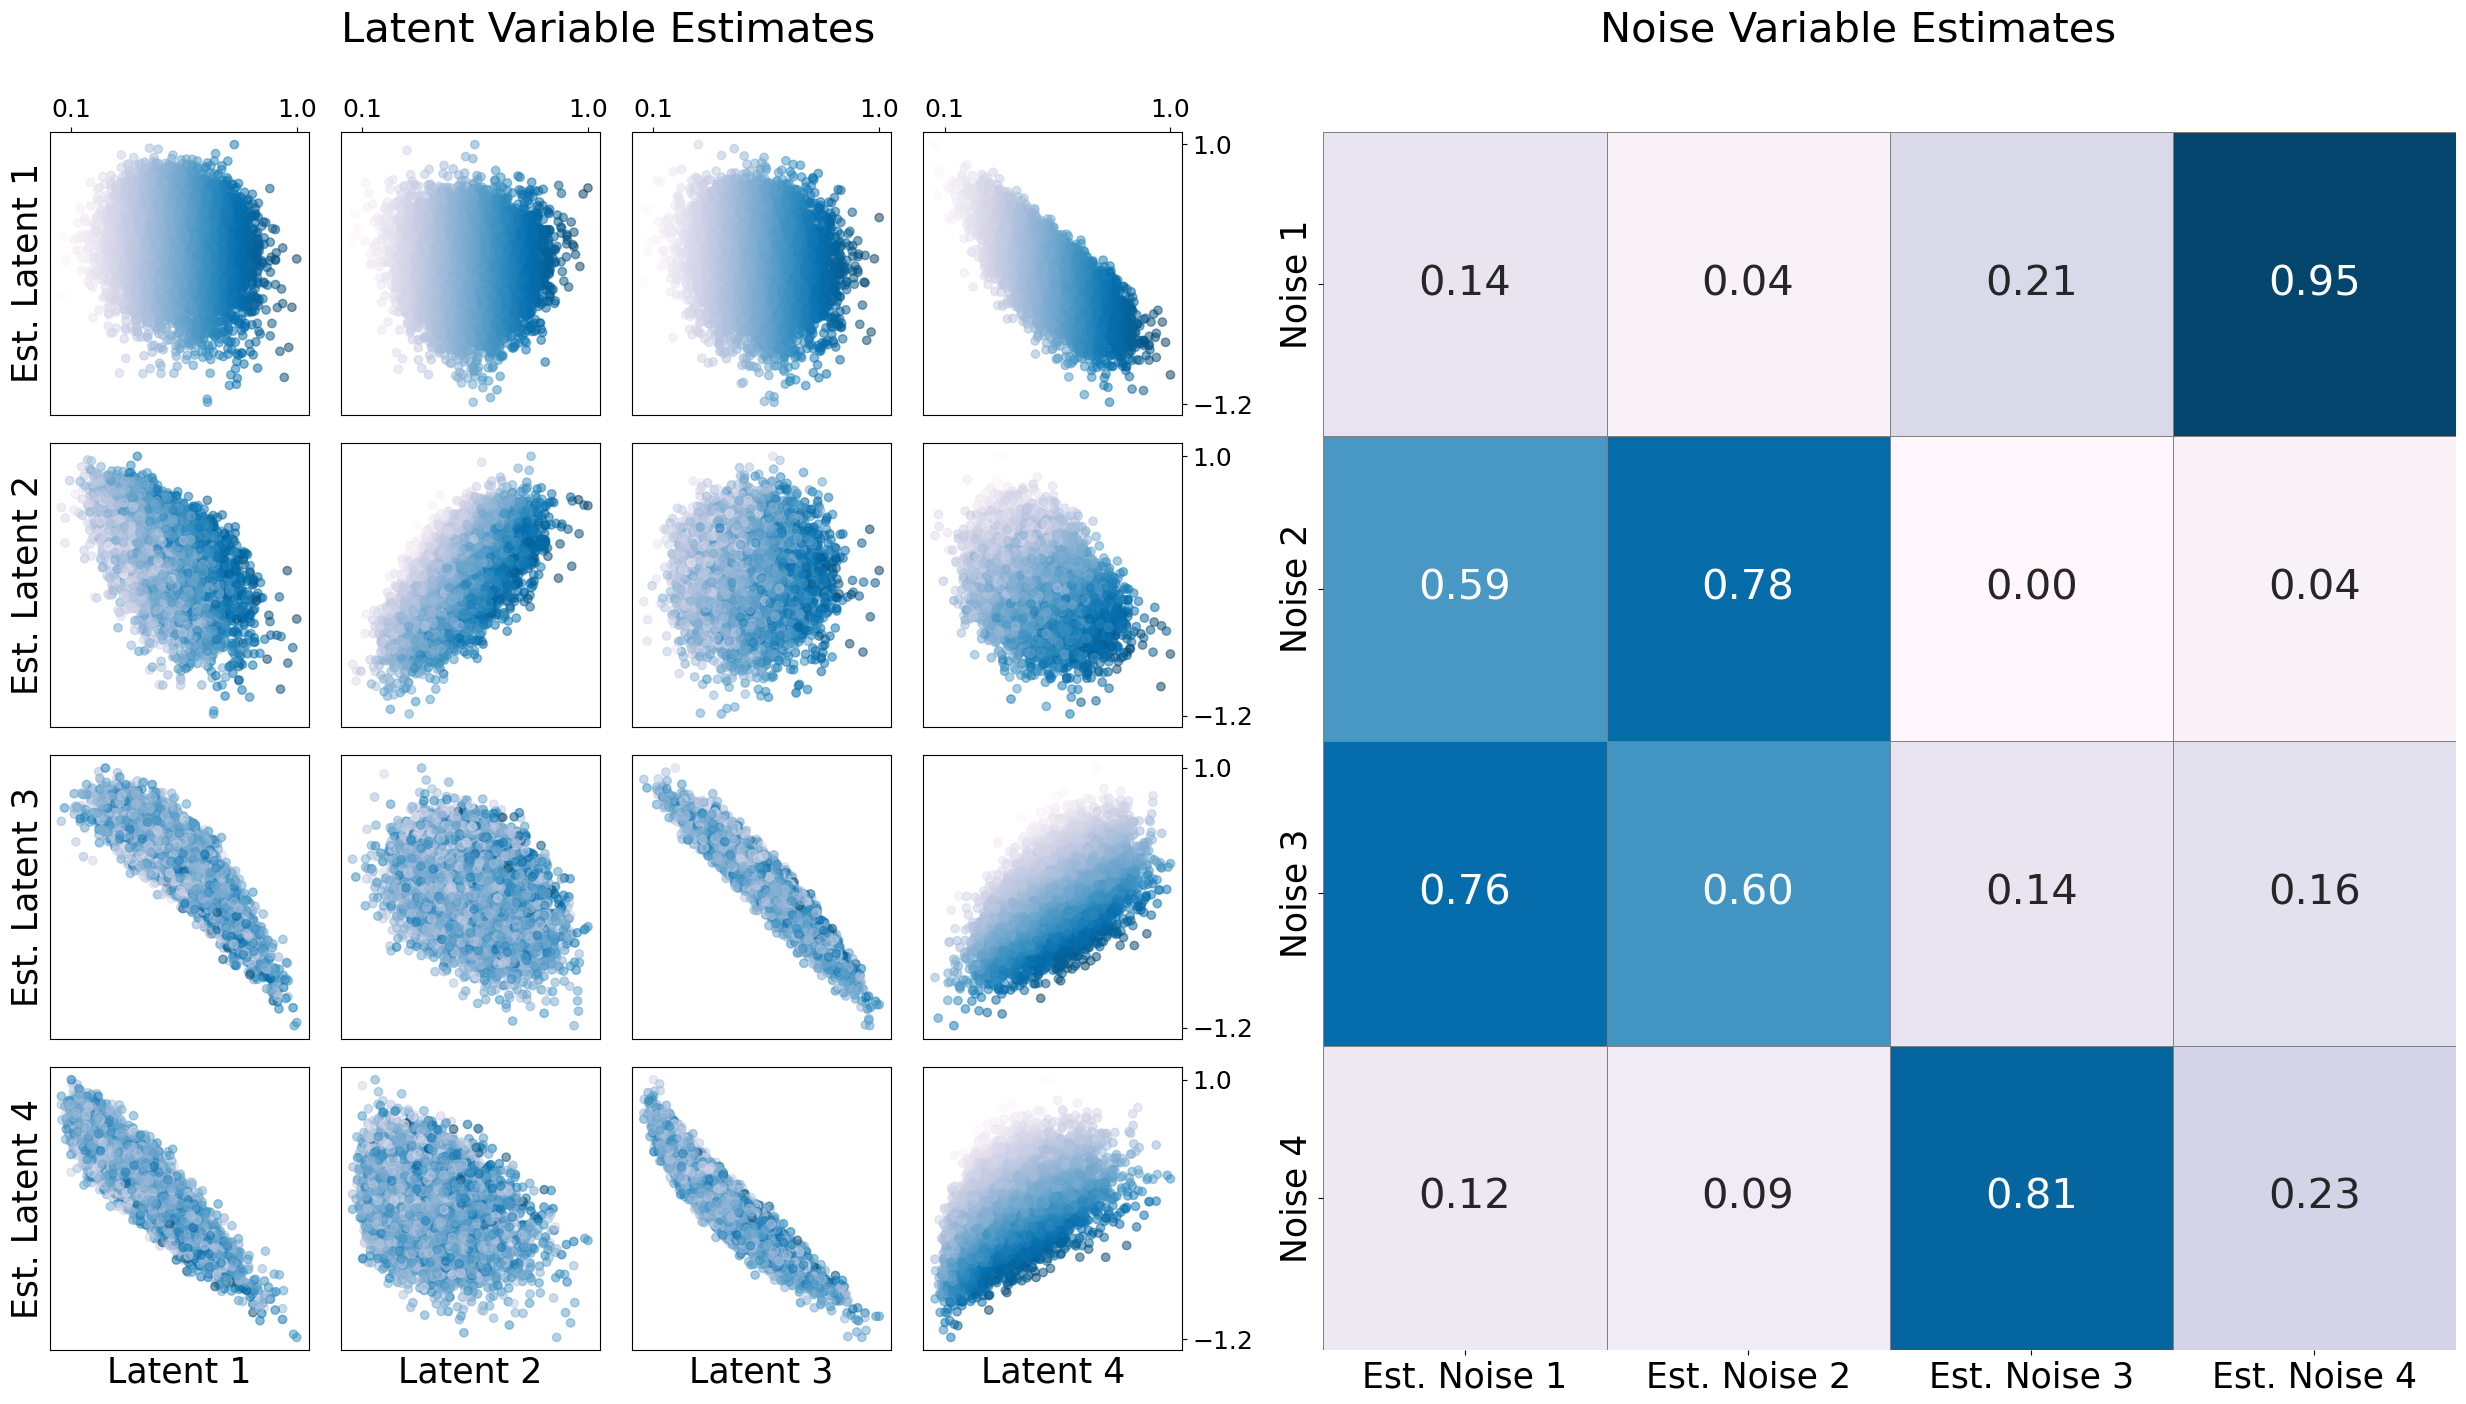

In [26]:
show_results(U, N, U_estimates, N_estimates)